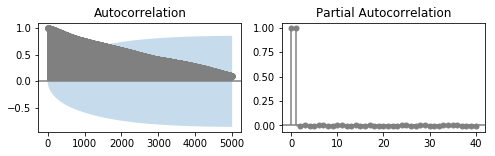

In [5]:
%matplotlib inline
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
n225 = pdr.DataReader('NIKKEI225', 'fred', '1949/5/16').dropna()
lnn225 = np.log(n225)
fig = plt.figure(figsize=(8,2))
ax1 = fig.add_subplot(1,2,1)
fig = sm.graphics.tsa.plot_acf(lnn225.squeeze(), lags=5000, color='gray', ax=ax1)
ax2 = fig.add_subplot(1,2,2)
fig = sm.graphics.tsa.plot_pacf(lnn225.squeeze(), lags=40, color='gray', ax=ax2)
# 偏自己相関の次数は突出部分まで1次？
# 形的にAR

In [7]:
arma_mod = sm.tsa.ARMA(lnn225, order=(1,0))
arma_res = arma_mod.fit(trend='c', disp=-1)
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:              NIKKEI225   No. Observations:                17034
Model:                     ARMA(1, 0)   Log Likelihood               50694.651
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 30 Oct 2017   AIC                        -101383.303
Time:                        20:39:02   BIC                        -101360.074
Sample:                    05-16-1949   HQIC                       -101375.643
                         - 10-27-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.6801      2.161      3.554      0.000       3.445      11.916
ar.L1.NIKKEI225     1.0000   1.97e-05   5.08e+04      0.000       1.000       1.000
                                

Text(0,0.5,'$\\hat{z_t}$')

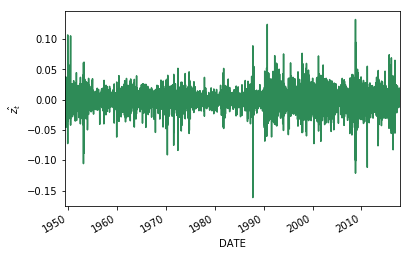

In [10]:
arma_res.resid.iloc[1:].plot(figsize=(6,4),color='seagreen')
plt.ylabel('$\hat{z_t}$')

In [11]:
from statsmodels.tsa import stattools
acf,q,pvalue = stattools.acf(arma_res.resid,nlags=5,qstat=True)
pacf,confint = stattools.pacf(arma_res.resid,nlags=5,alpha=0.05)
print('自己相関係数：',acf)
print('p値：',pvalue)
print('偏自己相関：',pacf)
print('95%信頼区間：',confint)

自己相関係数： [ 1.          0.00848555 -0.00132434  0.00496625  0.00558959 -0.00558818]
p値： [ 0.26804151  0.53349129  0.64208849  0.69733443  0.73977775]
変自己相関： [ 1.          0.00848605 -0.00139661  0.0049906   0.00550495 -0.00567101]
95%信頼区間： [[ 1.          1.        ]
 [-0.00653118  0.02350328]
 [-0.01641384  0.01362061]
 [-0.01002662  0.02000783]
 [-0.00951228  0.02052218]
 [-0.02068824  0.00934622]]


In [13]:
p=sm.tsa.adfuller(arma_res.resid, regression='nc')[1]
p1=sm.tsa.adfuller(arma_res.resid,regression='c')[1]
print('ドリフト無しランダムウォーク p値：',p)
print('ドリフト付きランダムウォーク p値：',p1)

ドリフト無しランダムウォーク p値： 0.0
ドリフト付きランダムウォーク p値： 0.0


In [15]:
from scipy.stats import t
resid=arma_res.resid.iloc[1:]
m=resid.mean()
v=resid.std()
resid_max=pd.Series.rolling(arma_res.resid,window=250).mean().max()
resid_min=pd.Series.rolling(arma_res.resid,window=250).mean().min()
print('平均:%2.5f'%m,"標準偏差:%2.4f"%v)
print('250日平均の最大値:%2.5f'%resid_max,"'250日平均の最大値:%2.4f"%resid_min)
print('250日平均の95%信頼区間:',(t.interval(alpha=0.95,df=250,loc=0,scale=v)))

平均:0.00029 標準偏差:0.0123
250日平均の最大値:0.00363 '250日平均の最大値:-0.0125
250日平均の95%信頼区間: (-0.024286989837670834, 0.024286989837670834)


Text(0,0.5,'$\\hat{z_t}$')

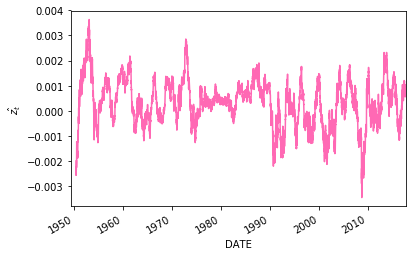

In [17]:
pd.Series.rolling(arma_res.resid.iloc[1:],window=250).mean().plot(figsize=(6,4),color='hotpink')
plt.ylabel('$\hat{z_t}$')

In [22]:
from scipy.stats import chi2
resid=arma_res.resid.iloc[1:]
m=resid.mean()
v=resid.std()
resid_max=pd.Series.rolling(arma_res.resid,window=250).std().max()
resid_min=pd.Series.rolling(arma_res.resid,window=250).std().min()
print('平均:%2.5f'%m,"標準偏差:%2.4f"%v)
print('250日標準偏差の最大値:%2.5f'%resid_max,"'250日標準偏差の最大値:%2.4f"%resid_min)
cint1,cint2=chi2.interval(alpha=(0.95), df=249)
print('250日標準偏差の95％信頼区間:%2.4f'%(np.sqrt(cint1/249)*v),)
print('<= \sigma <=%2.4f'%(np.sqrt(cint2/249)*v))

平均:0.00029 標準偏差:0.0123
250日標準偏差の最大値:0.15969 '250日標準偏差の最大値:0.0042
250日標準偏差の95％信頼区間:0.0112
<= \sigma <=0.0134


Text(0,0.5,'$\\hat{z_t}$')

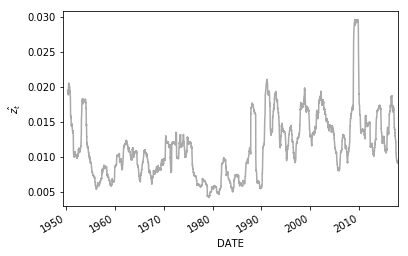

In [23]:
pd.Series.rolling(arma_res.resid.iloc[1:],window=250).std().plot(figsize=(6,4),color='darkgray')
plt.ylabel('$std$')

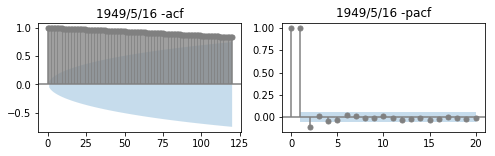

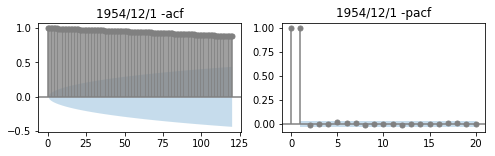

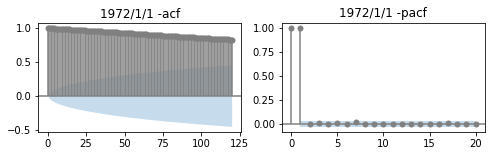

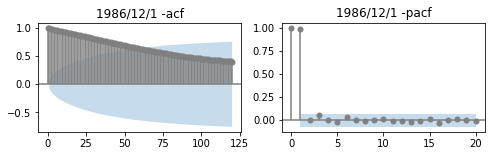

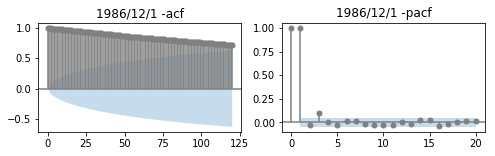

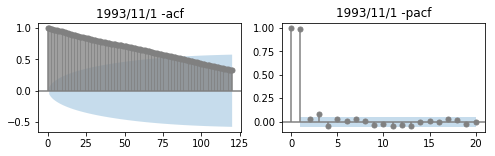

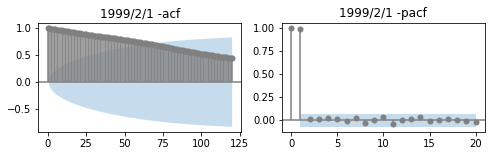

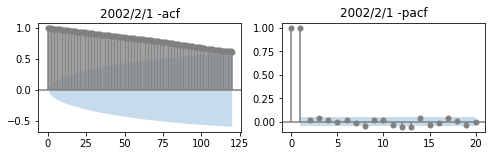

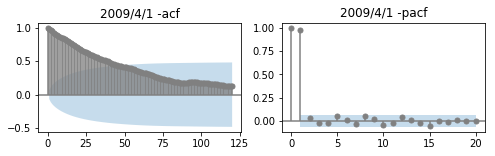

In [30]:
bcs=["1949/5/16","1954/12/1","1972/1/1","1986/12/1","1986/12/1","1993/11/1","1999/2/1","2002/2/1","2009/4/1"]
bce=["1954/11/30","1971/12/31","1986/11/30","1989/11/30","1993/10/30","1999/1/31","2002/1/31","2009/3/31","2012/11/30"]
for i in range(len(bcs)):
    y = lnn225.ix[bcs[i]:bce[i]].dropna()
    fig = plt.figure(figsize=(8,2))
    ax1 = fig.add_subplot(1,2,1)
    fig = sm.graphics.tsa.plot_acf(y.squeeze(), lags=120, color='gray', ax=ax1)
    plt.title(bcs[i]+' -acf')
    ax2 = fig.add_subplot(1,2,2)
    fig = sm.graphics.tsa.plot_pacf(y.squeeze(), lags=20, color='gray', ax=ax2)
    plt.title(bcs[i]+' -pacf')

In [29]:
for i in range(len(bcs)):
    y = lnn225.ix[bcs[i]:bce[i]].dropna()
    arma_mod = sm.tsa.ARMA(y, order=(1,0))
    arma_res = arma_mod.fit(trend='c', disp=-1)
    print(bcs[i],arma_res.arparams,arma_res.resid.std())

1949/5/16 [ 0.99941746] 0.0161231067464
1954/12/1 [ 0.99995716] 0.0188559859703
1972/1/1 [ 0.99995969] 0.0173655144554
1986/12/1 [ 0.99931747] 0.0174983595426
1986/12/1 [ 0.99803649] 0.0152233211237
1993/11/1 [ 0.99425359] 0.0146583421686
1999/2/1 [ 0.99766296] 0.0157574944333
2002/2/1 [ 0.99795655] 0.0166985980761
2009/4/1 [ 0.98415862] 0.0139487795769
